In [1]:
import collaborative_filtering_tools as cf
import numpy as np

## Utility matrix creation

In [2]:
cf.get_client_indices('train_ver2_month1-16')

creating ../train_ver2_month1-16_client_indices.npy
chunk 0 from 1271.5856. (0.067291 secs)
chunk 127 from 1271.5856. (849.389498 secs)
chunk 254 from 1271.5856. (1639.744911 secs)
chunk 381 from 1271.5856. (2348.644979 secs)
chunk 508 from 1271.5856. (3073.238852 secs)
chunk 635 from 1271.5856. (3762.042826 secs)
chunk 762 from 1271.5856. (4456.501061 secs)
chunk 889 from 1271.5856. (5145.896393 secs)
chunk 1016 from 1271.5856. (5913.382765 secs)
chunk 1143 from 1271.5856. (6668.925796 secs)
chunk 1270 from 1271.5856. (7432.371488 secs)


array([ 805101.,  539860.,  539861., ...,  737066.,  737048.,  737051.])

In [2]:
train_utility_matrix,client_n_months = cf.get_utility_matrix('train_ver2_month1-16')

creating ../train_ver2_month1-16_utility_matrix.npy
chunk 0 from 1271.5856. (0.0010167 minutes)


collaborative_filtering_tools.py:186: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  client_n_months[chunk_client_indices[il]] += 1
collaborative_filtering_tools.py:187: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  utility_matrix[chunk_client_indices[il],ip] \
collaborative_filtering_tools.py:188: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  += getattr(chunk,product_id)[il]


chunk 127 from 1271.5856. (12.0902705 minutes)
chunk 254 from 1271.5856. (24.30438965 minutes)
chunk 381 from 1271.5856. (36.6481646833 minutes)
chunk 508 from 1271.5856. (48.0570303833 minutes)
chunk 635 from 1271.5856. (59.6738215167 minutes)
chunk 762 from 1271.5856. (71.0254116167 minutes)
chunk 889 from 1271.5856. (82.9720804333 minutes)
chunk 1016 from 1271.5856. (95.3965232333 minutes)
chunk 1143 from 1271.5856. (107.909131833 minutes)
chunk 1270 from 1271.5856. (120.28502055 minutes)


In [3]:
train_utility_matrix,client_n_months = cf.get_utility_matrix('train_ver2_month17')

creating ../train_ver2_month17_utility_matrix.npy
creating ../train_ver2_month17_client_indices.npy
chunk 0 from 93.1455. (0.000849516666676 minutes)
chunk 9 from 93.1455. (0.6832319 minutes)
chunk 18 from 93.1455. (1.30985303333 minutes)
chunk 27 from 93.1455. (2.08783601667 minutes)
chunk 36 from 93.1455. (2.8204904 minutes)
chunk 45 from 93.1455. (3.52063848333 minutes)
chunk 54 from 93.1455. (4.21861198333 minutes)
chunk 63 from 93.1455. (5.11296471667 minutes)
chunk 72 from 93.1455. (6.03026825 minutes)
chunk 81 from 93.1455. (6.8223085 minutes)
chunk 90 from 93.1455. (7.49711261667 minutes)
chunk 0 from 93.1455. (0.00127639999999 minutes)
chunk 9 from 93.1455. (0.76891415 minutes)
chunk 18 from 93.1455. (1.52797251667 minutes)
chunk 27 from 93.1455. (2.28504941667 minutes)
chunk 36 from 93.1455. (3.04226678333 minutes)
chunk 45 from 93.1455. (3.79667725 minutes)
chunk 54 from 93.1455. (4.55301718333 minutes)
chunk 63 from 93.1455. (5.31067506667 minutes)
chunk 72 from 93.1455. (6

In [2]:
train_utility_matrix,client_n_months = cf.get_utility_matrix('train_ver2')
print train_utility_matrix.shape

creating ../train_ver2_utility_matrix.npy
chunk 0 from 1364.731. (0.00121358333333 minutes)


collaborative_filtering_tools.py:187: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  client_n_months[chunk_client_indices[il]] += 1
collaborative_filtering_tools.py:188: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  utility_matrix[chunk_client_indices[il],ip] \
collaborative_filtering_tools.py:189: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  += getattr(chunk,product_id)[il]


chunk 136 from 1364.731. (10.2419894167 minutes)
chunk 272 from 1364.731. (21.5132390833 minutes)
chunk 408 from 1364.731. (33.2918861667 minutes)
chunk 544 from 1364.731. (45.2498420667 minutes)
chunk 680 from 1364.731. (56.99100985 minutes)
chunk 816 from 1364.731. (68.47478455 minutes)
chunk 952 from 1364.731. (80.0217520167 minutes)
chunk 1088 from 1364.731. (91.5961113167 minutes)
chunk 1224 from 1364.731. (103.1445305 minutes)
chunk 1360 from 1364.731. (114.670069183 minutes)
(956645, 24)


## plot mean_user_rating

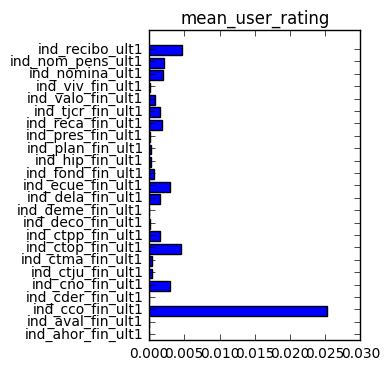

In [8]:
train_utility_matrix,client_n_months = cf.get_utility_matrix('train_ver2_month1-16')
product_ids = cf.get_product_ids('train_ver2_month1-16')

mean_user_rating = np.nanmean(train_utility_matrix,axis=0)
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(122)
ax1.barh(range(mean_user_rating.shape[0]),mean_user_rating)
plt.yticks(np.array(range(mean_user_rating.shape[0]))+0.5, product_ids)
plt.title('mean_user_rating')
plt.show()

## Prediction

In [79]:
train_utility_matrix,client_n_months = cf.get_utility_matrix('train_ver2_month1-16')
train_item_prediction = cf.predict_memory_based(train_utility_matrix, type='item')

test_utility_matrix,client_n_months = cf.get_utility_matrix('train_ver2_month17')

print test_utility_matrix.shape
print train_item_prediction.shape

(931453, 24)
(951952, 24)


In [7]:
print train_utility_matrix.shape
print item_prediction.shape

(951952, 24)
(951952, 24)


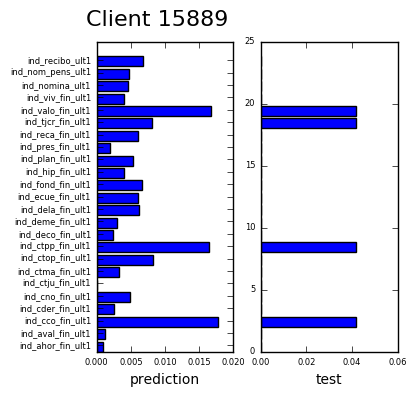

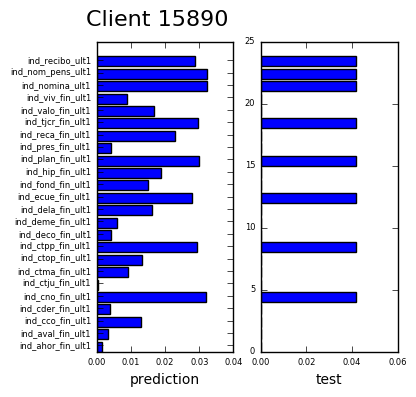

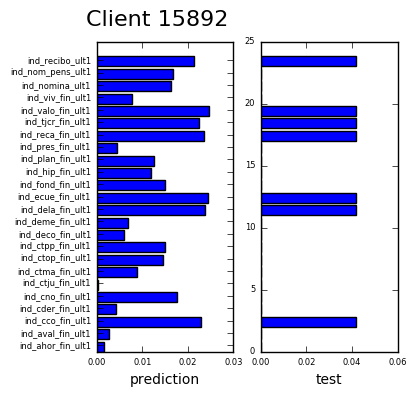

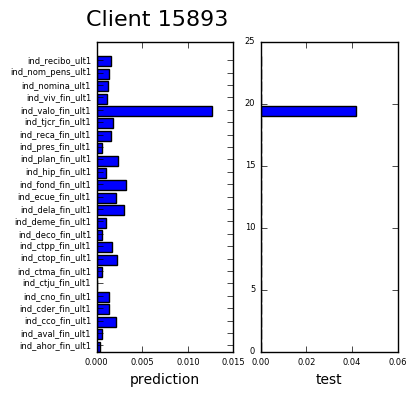

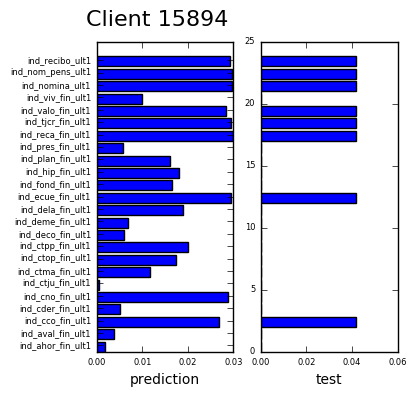

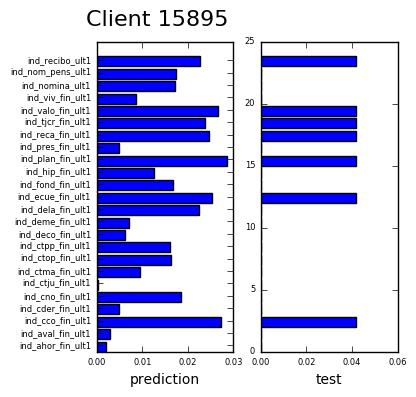

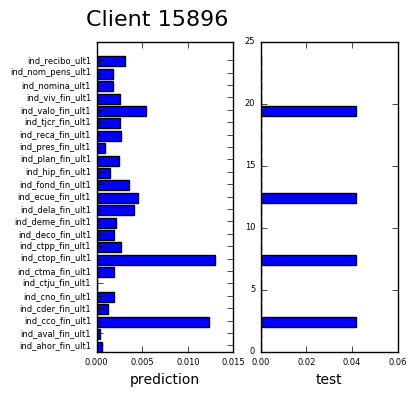

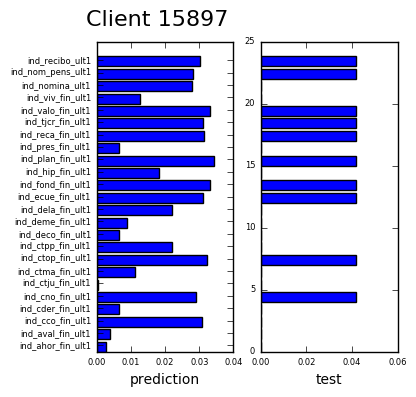

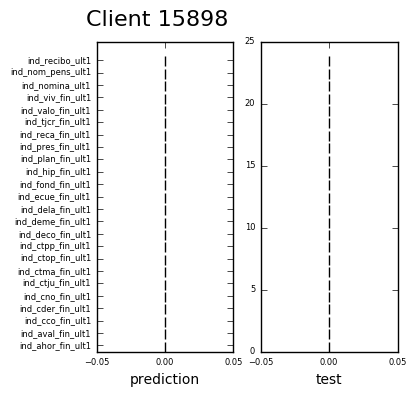

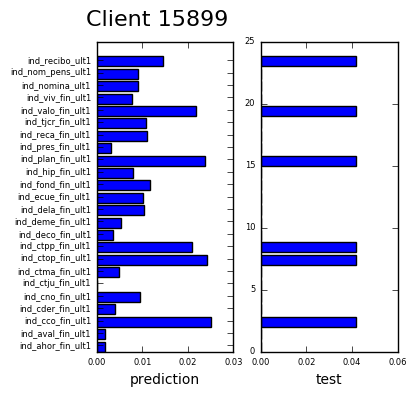

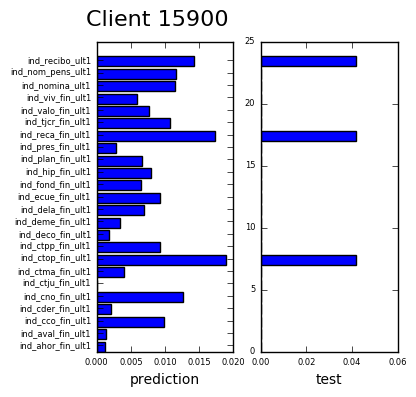

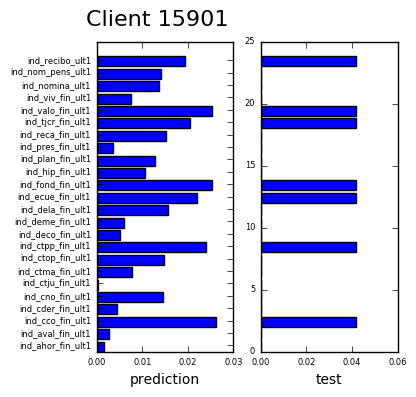

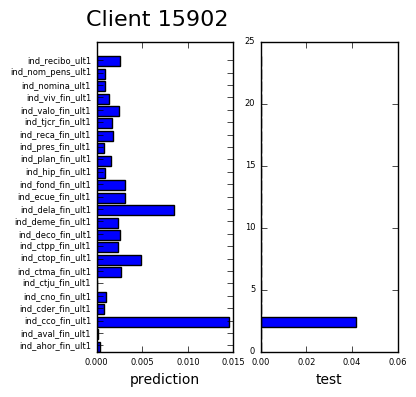

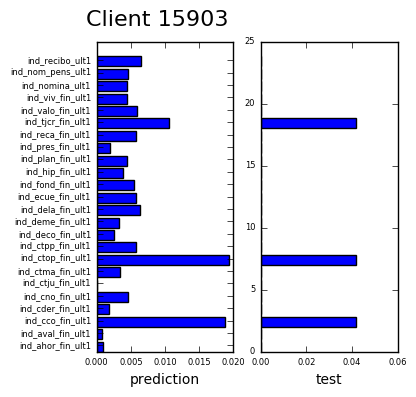

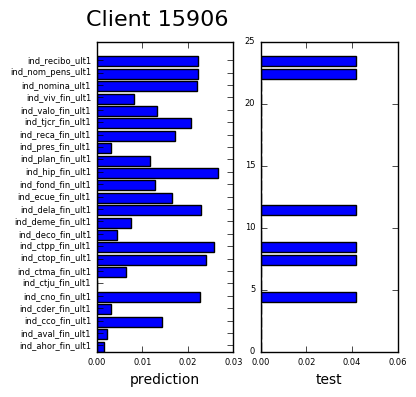

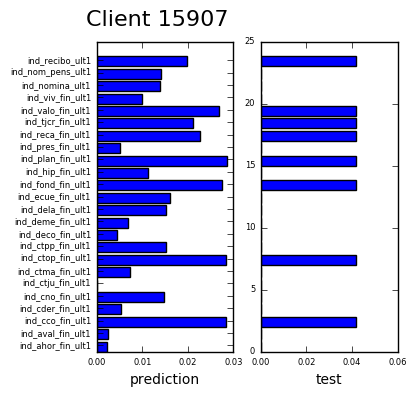

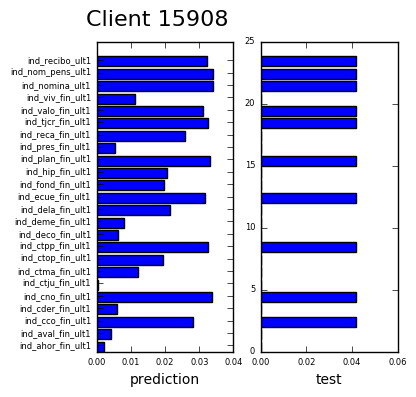

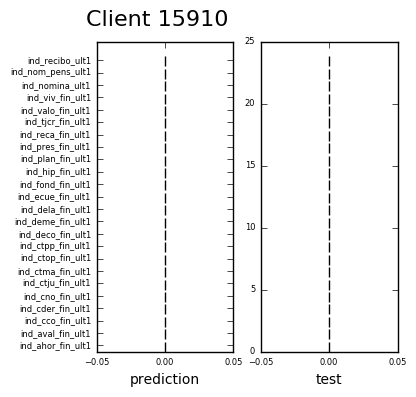

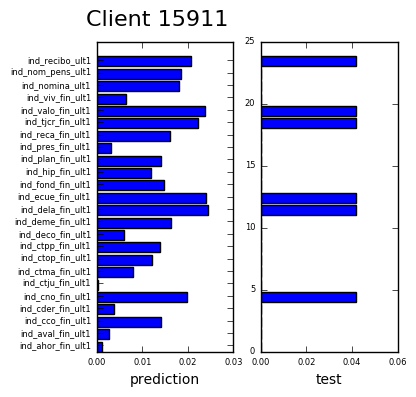

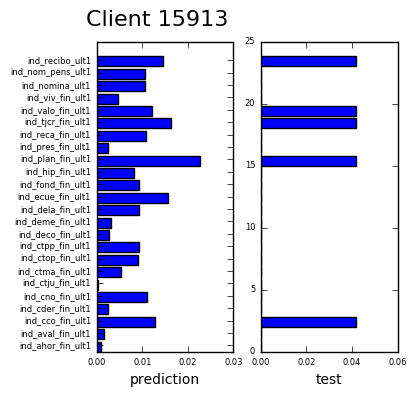

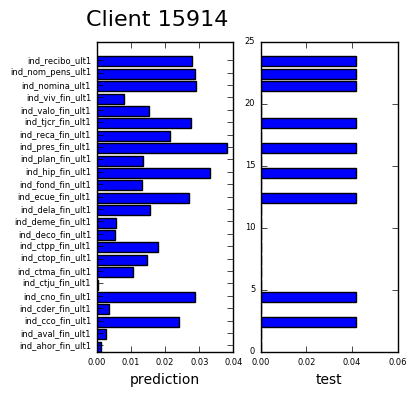

In [102]:
train_data = cf.get_data_dict('train_ver2_month1-16')
test_data = cf.get_data_dict('train_ver2_month17')

product_ids = cf.get_product_ids('train_ver2_month1-16')
n_products = len(product_ids)

import matplotlib.pyplot as plt

for client_test_ind, client_id in enumerate(test_data['client_ids']):
    client_train_ind_list = \
    np.where(test_data['client_ids'][client_test_ind] == train_data['client_ids'])[0][:]
    assert(client_train_ind_list.shape[0]==1),'client_train_ind should be unique'
    client_train_ind = client_train_ind_list[0]
    #print client_train_ind
    
    fig = plt.figure()
    plt.suptitle('Client ' + str(client_id),fontsize=16)

    ax1 = fig.add_subplot(132)
    ax1.barh(range(train_item_prediction.shape[1]),train_item_prediction[client_train_ind,:].transpose())
    plt.yticks(np.array(range(n_products))+0.5, product_ids)
    plt.tick_params(labelsize=6)
    plt.locator_params(axis='x',nbins=4)
    plt.xlabel('prediction')

    ax2 = fig.add_subplot(133)
    ax2.barh(range(test_utility_matrix.shape[1]),test_utility_matrix[client_test_ind,:].transpose())
    plt.tick_params(labelsize=6)
    plt.locator_params(axis='x',nbins=4)
    plt.xlabel('test')

    plt.show()

    if client_test_ind == 20: break